# 범주형 변수

In [3]:
import numpy as np
blood = ['A', 'A', 'A', "B", 'B', 'AB', 'O']
np.unique(blood, return_counts=True)


(array(['A', 'AB', 'B', 'O'], dtype='<U2'), array([3, 1, 2, 1], dtype=int64))

In [6]:
import pandas as pd
pd.Series(blood).value_counts()

A     3
B     2
AB    1
O     1
dtype: int64

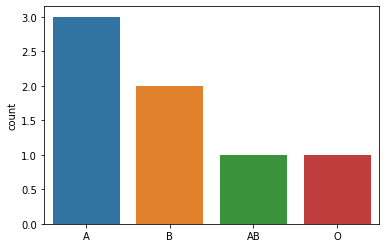

In [8]:
import seaborn as sns
sns.countplot(blood)

# 연속형 변수

In [25]:
x = [1, 1, 1, 2, 3, 5,5, 7, 8, 9]
hist, edges = np.histogram(x, 4)

In [26]:
edges

array([1., 3., 5., 7., 9.])

In [27]:
hist

array([4, 1, 2, 3], dtype=int64)

### 빈도수 대로 나누어서 사용
bin= 4 범위를 4개의 구간으로 나눔

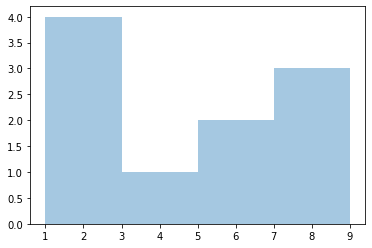

In [29]:
sns.distplot(x , bins=4 ,kde=False)

# 중심경향치(평균, 최빈치, 중앙값) 

## 평균(mean) : 자료의 합을 자료의 갯수로 나눈 값

In [30]:
x = [100, 100, 200 ,400, 500]

In [32]:
np.mean(x)

260.0

## median = 가장 작은값부터 큰값까지 정렬후 중간값을 구함

In [37]:
np.median(x)

200.0

### 데이터가 짝수 개일 경우에는 가운데 두 값의 평균을 나타냄

In [39]:
np.median(x[0:4])

150.0

## 최빈값(mode): 가장 빈번하게 관찰/측정되는 값

In [43]:
from scipy.stats import mode
mode(x)

ModeResult(mode=array([100]), count=array([2]))

# 변상성 측정치(분산, 표준편차, 범위, 사분위간 범위)

## 변산성(variability): 자료가 흩어져 있는 정도, 혹은 개체에 따라 변할 수 있는 정도
## 중심 경향치: 자료가 무엇을 중심으로 모여있는가(혹은 흩어져 있는가)를 나타는것이라면 변산성 측정치는, 그 모여있는 정도(혹은 흩어져 있는 정도를)의미함

In [65]:
x = [1, 1, 2, 3, 3, 3, 4, 5, 5, 7]

## 범위(range)
최댓값- 최솟값 

In [46]:
x_range = np.max(x) -np.min(x)
print(x_range)

6


## 분산: 평균에서 데이터가 벗어난 정도를 수치화 한값
1. 각각의 데이터에서 평균값을 뺴고, 그것을 제곱하여 평균을 구함
2. 분산이 크면: 데이터가 평균에서 많이 벗어나 있다.
3. 분산이 작으면: 데이터가 평균 주변에 모여 있다.

In [47]:
numpy.var(x)

3.2399999999999998

## 표준편차: 분산의 양의 제곱근

In [48]:
numpy.std(x)

1.8

In [49]:
np.sqrt(np.var(x))

1.8

## 사분위간 범위(IQR, InterQuartile Range)는 제3사분위수에서 제1사분위수 간의 범위
1. 사분위수란 전체 데이터를 작은 값부터 큰값까지 순서대로 나열후 4등분 하였을 떄, 각지점에 해당하는 값
제1사분위수(Q1) : 25% 지점<br>
제2사분위수(Q2) : 50% 지점 = 중간값 <br>
제3사분위수(Q3) : 75% <br> 
2. 제1사분위수와 제 3사분위수 사이의 구간에는 항상 전체 데이터의 50%가 포함이된다.
3. 사분위는 임위로 정하는 기준으로 필요에 따라 십분위 등으로 변경이 가능하다.
<strong>이는 극단값의 영향을 줄일수 있다.</strong>

In [66]:
x.append(9)
x.append(10)
print(x)

[1, 1, 2, 3, 3, 3, 4, 5, 5, 7, 9, 10]


In [67]:
Q1 = np.quantile(x, .25)
Q1

2.75

In [68]:
Q2 = np.quantile(x, .5)
Q2

3.5

In [69]:
np.median(x)

3.5

In [70]:
Q3 = np.quantile(x, .75)
Q3

5.5

In [71]:
print("사분위간 범위: {}".format(Q3- Q1))


사분위간 범위: 2.75


## 변산성 측정치를 이용한 이상점(outliner) 진단
- 대부분의 자료는 중심경향치 주변에 몰려있음
- 변산성 측정치를 기준으로 벗어난 정도를 파악할 수 있다.
- 평균에서 벗어난 정도를 판단할 때는 표준편차를 사용
- 평균에서 표준편자의 n배 떨어져 있으면 "n 표준편차"와 같이 표현
- 중간값에서 벗어난 정도를 판단할 떄는 Inter Quantile Range 를 사용
- 중심경향치에서 크게 벗어났다면 이상점으로 의심할 수 있다.

# 공분산
공분산(coariance): 두 변수가 함께 변화하는 정도를 나타내는 지표

## 공분산의 해석

부호:
- 공분산이 +인 경우: 두 변수가 같은 방향으로 변화(하나가 증가하면 다른 하나가 증가)
- 공분산이 -인 경우: 두 변수가 반대 방향으로 변화(하나가 증가하면 다른 하는 감소)
크기:
- 공분산 =0이면 두 변수가 독립,즉, 한변수의 변화로 다른 변수의 변화를 예측 못함
- 공분산의 크기가 클수록 두 변수는 함께 많이 변화
- 단위에 따라 공분산의 크기가 달라지므로 절대적 크기로 판단이 어려움
- 공분산의 -1 ~1 범위로 표준화 시킨 것이 상관계수
<br> <strong> 공분산은 선형적인 관계를 측정하기 떄문에 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정하지 </strong>

In [73]:
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

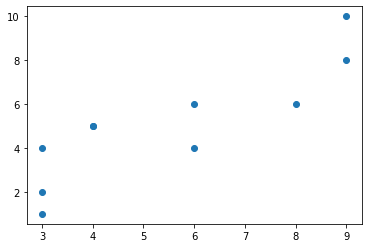

In [74]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')

In [75]:
np.cov(x, y)

array([[6.05555556, 5.61111111],
       [5.61111111, 6.98888889]])

In [76]:
np.cov(x, y)[0, 1]

5.61111111111111

<br> <strong> 공분산은 선형적인 관계를 측정하기 떄문에 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정하지 못함</strong>

**선형적  : 직선관계**<br>
**비선형적 :직선이 아닌관계 ex)곡선**

w = z제곱의 관계

In [81]:
z = [-3, -2, -1, 0, 1, 2, 3]
w = [9, 4, 1, 0, 1, 4, 9]

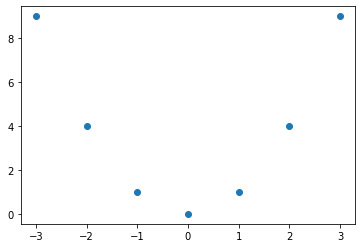

In [80]:
plt.plot(z, w, 'o')

In [79]:
np.cov(z,w)[0,1]

0.0

# 상관계수: 두변수가 함께 변하는 정도를 -1 ~1 범위의 수로 나타낸것

## 피어슨 상관계수
- 칼 피어슨이 개발한 상관계수
- 적률상관계수(product-moment correlation coefficient)라고도 함
- 일반적으로 상관계수라고 하면 피어슨 상관계수를 말함

## 상관 계수의 해석
부호:
- 상관이 +인 경우: 두 변수가 같은 방향으로 변화(하나가 증가하면 다른 하나도 증가)
- 상관이 -인 경우: 두 변수가 반대 방향으로 변화(하나가 증가하면 다른 하나는 감소)
크기:
- 상관이= 0 이면 두 변수가 독립,즉, 한 변수의 변화로 다른 변수의 변화를 예측하지 못함
- 상관이 클 수록 두 변수는 함께 많이 변화
- pearson 상관계수를 제곱하면 분산(=변화량)에서 공유하는 비율
 1. 예를 들어 x와 y의 상관계수가 0.4이면 그 제곱은 0.16(=16%)
 2. x의 분산 중 16%를 y와 공유 또는 x의 분산중 16%가 y로 설명됨
 
<br>
<strong>pearson 상관계수는 공분산을 그 기반으로 하기 때문에, 기본적으로 등간척도/비율척도를 사용한 변수에만  적용이 가능하다</strong>


연속형 자료를 나타내는 척도로는 등간 척도와 비율 척도가 있다. <br>
등간척도(interval scale): 속성을 편가할 수 있는 균일한 간격을 두고 측정하는 척도<br> 
비율척도(reatio scale): 절대 영점이 있는 등간 척도

In [82]:
np.corrcoef(x,y)

array([[1.        , 0.86251728],
       [0.86251728, 1.        ]])

두변수의 상관계수만 확인하려면

In [83]:
np.corrcoef(x,y)[0,1]

0.8625172792135779

In [87]:
cov = np.cov(x, y)[0,1] # 공분산
xsd = np.std(x, ddof=1) # x의 표준편차
ysd = np.std(y, ddof=1) # y의 표준편차 자유도는 평균으로 인해 n-1 이기 때문에 ddof=1 로 해준다

corrocef =  cov/ (xsd*ysd)

In [88]:
corrocef

0.8625172792135778

In [89]:
np.corrcoef(z,w)[0,1]

0.0

## spearman 상관계수

- 상관분석을 실시함에 있어 서열척도를 사용한 변수가 포함되어 있거나
- 등간/비율척도를 상용한 변수들이라 하더라고, 두 변수 간의 관계가 비선형적 일 때 구하는 상관계수

In [90]:
import scipy.stats

scipy.stats.spearmanr(x, y).correlation

0.9000703207408192

## kendall의 tau
- spearman의 상관계수와 마찬가지로, 비선형적 관계이거나 서열변수일때 사용

In [91]:
scipy.stats.kendalltau(x, y).correlation

0.8153742483272113